<a href="https://colab.research.google.com/github/umairashrafyo/Machine-learning-and-deep-learning/blob/main/HUMAN_ACTIVITY_RECOGNITION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Fetching Dataset


In [1]:
#Mounting google drive to store dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing necessary libraries
import os
import pandas as pd

In [4]:

#Downloading data from UCI Machine Learning repository
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
!unzip MHEALTHDATASET.zip

--2021-05-07 18:25:19--  http://archive.ics.uci.edu/ml/machine-learning-databases/00319/MHEALTHDATASET.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 75567983 (72M) [application/x-httpd-php]
Saving to: ‘MHEALTHDATASET.zip’

MHEALTHDATASET.zip  100%[===================>]  72.07M  5.81MB/s    in 18s     

2021-05-07 18:25:37 (4.10 MB/s) - ‘MHEALTHDATASET.zip’ saved [75567983/75567983]

Archive:  MHEALTHDATASET.zip
   creating: MHEALTHDATASET/
  inflating: MHEALTHDATASET/mHealth_subject1.log  
  inflating: MHEALTHDATASET/mHealth_subject10.log  
  inflating: MHEALTHDATASET/mHealth_subject2.log  
  inflating: MHEALTHDATASET/mHealth_subject3.log  
  inflating: MHEALTHDATASET/mHealth_subject4.log  
  inflating: MHEALTHDATASET/mHealth_subject5.log  
  inflating: MHEALTHDATASET/mHealth_subject6.log  
  inflating: MHEALTHDATASE

In [5]:
! cat MHEALTHDATASET/README.txt



*************************************************** mHealth dataset **********************************************************

Authors: Oresti Ba�os, Rafael Garcia, Alejandro Saez
Date: 22/10/2013
Institution: University of Granada (UGR) 
Department: Department of Computer Architecture and Computer Technology.
Contact: oresti@ugr.es (oresti.bl@gmail.com)

---------------------------------------------------------------------------------------------------------------------------------------------
NOTE: if you use this dataset please cite the following work

Banos, O., Garcia, R., Holgado-Terriza, J.A., Damas, M., Pomares, H., Rojas, I., Saez, A., Villalonga, C.: 
mHealthDroid: a novel framework for agile development of mobile health applications. 
In: Proceedings of the 6th International Work-conference on Ambient Assisted Living an Active Ageing (IWAAL 2014), Belfast, United Kingdom, December 2-5 (2014)

Insightful figures and descriptions are presented within this work.
-------------

In [6]:
os.listdir('MHEALTHDATASET/')

['mHealth_subject3.log',
 'mHealth_subject8.log',
 'mHealth_subject7.log',
 'mHealth_subject9.log',
 'mHealth_subject6.log',
 'mHealth_subject1.log',
 'mHealth_subject4.log',
 'mHealth_subject5.log',
 'mHealth_subject2.log',
 'README.txt',
 'mHealth_subject10.log']

In [7]:
for i in os.listdir('MHEALTHDATASET/'):
  if i not in ('README.txt'):
    print(i)

mHealth_subject3.log
mHealth_subject8.log
mHealth_subject7.log
mHealth_subject9.log
mHealth_subject6.log
mHealth_subject1.log
mHealth_subject4.log
mHealth_subject5.log
mHealth_subject2.log
mHealth_subject10.log


In [8]:
df = pd.DataFrame()
#loop to combine all data
for i in range(1,11):
    df1 = pd.read_csv(f'MHEALTHDATASET/mHealth_subject{i}.log', header=None, sep='\t')
    df1 = df1.loc[:, [5,6,7,8,9,10,14,15,16,17,18,19, 23]]
    df1 = df1.rename(columns={
        5:"alx", 6:"aly", 7:"alz", 8:"glx", 9:"gly", 10:"glz", 14:"arx",15:"ary", 16:"arz", 17:"grx", 18:"gry", 19:"grz", 23:"Activity"
        })
    df1['subject'] = 'subject'+str(i)
    df = pd.concat([df,df1])

In [14]:
#storing data in google drive
df.to_csv('/content/MHEALTHDATASET/mhealth_raw_data.csv',index = False)

In [15]:
#reading data
df = pd.read_csv('/content/MHEALTHDATASET/mhealth_raw_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,2.1849,-9.6967,0.63077,0.103900,-0.84053,-0.68762,-8.6499,-4.5781,0.187760,-0.449020,-1.01030,0.034483,0,subject1
1,2.3876,-9.5080,0.68389,0.085343,-0.83865,-0.68369,-8.6275,-4.3198,0.023595,-0.449020,-1.01030,0.034483,0,subject1
2,2.4086,-9.5674,0.68113,0.085343,-0.83865,-0.68369,-8.5055,-4.2772,0.275720,-0.449020,-1.01030,0.034483,0,subject1
3,2.1814,-9.4301,0.55031,0.085343,-0.83865,-0.68369,-8.6279,-4.3163,0.367520,-0.456860,-1.00820,0.025862,0,subject1
4,2.4173,-9.3889,0.71098,0.085343,-0.83865,-0.68369,-8.7008,-4.1459,0.407290,-0.456860,-1.00820,0.025862,0,subject1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1215740,1.7849,-9.8287,0.29725,-0.341370,-0.90056,-0.61493,-3.7198,-8.9071,0.294230,0.041176,-0.99384,-0.480600,0,subject10
1215741,1.8687,-9.8766,0.46236,-0.341370,-0.90056,-0.61493,-3.7160,-8.7455,0.448140,0.041176,-0.99384,-0.480600,0,subject10
1215742,1.6928,-9.9290,0.16631,-0.341370,-0.90056,-0.61493,-3.8824,-9.1155,0.450480,0.041176,-0.99384,-0.480600,0,subject10
1215743,1.5279,-9.6306,0.30458,-0.341370,-0.90056,-0.61493,-3.5564,-9.1441,0.594880,0.041176,-0.99384,-0.480600,0,subject10


In [16]:
df.Activity.value_counts()

0     872550
11     30720
10     30720
9      30720
5      30720
4      30720
3      30720
2      30720
1      30720
7      29441
8      29337
6      28315
12     10342
Name: Activity, dtype: int64

In [17]:
#The data is highly inbalanced so resampling it. 
from sklearn.utils import resample
 
df_majority = df[df.Activity==0]
df_minorities = df[df.Activity!=0]
 
df_majority_downsampled = resample(df_majority,n_samples=30000, random_state=42)
df = pd.concat([df_majority_downsampled, df_minorities])
df.Activity.value_counts()

11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     30000
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [19]:
#storing new dataset in google drive
df.to_csv('/content/MHEALTHDATASET/mhealth_resampled_data.csv',index = False)

Importing data

In [28]:
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
 
%matplotlib inline

In [29]:
df = pd.read_csv('/content/MHEALTHDATASET/mhealth_resampled_data.csv')
df

,alx,aly,alz,glx,gly,glz,arx,ary,arz,grx,gry,grz,Activity,subject
0,-0.68636,-5.2902,4.64530,0.13544,-0.83114,-0.13163,-8.4230,-6.6402,2.98050,-0.93922,0.090349,0.219830,0,subject1
1,1.00030,-7.7902,-6.74410,-0.26531,-0.14447,-1.09820,2.2046,-7.5497,4.02880,-0.21961,-1.080100,0.303880,0,subject8
2,1.53220,-9.5966,-0.25618,-0.27273,-0.75985,0.63654,-2.5898,-8.5217,3.83430,-0.88431,-0.848050,0.331900,0,subject2
3,1.78090,-8.5942,-3.97440,-0.41002,-0.55535,-0.78389,-1.0049,-6.8588,2.11540,-0.35686,-0.854210,-0.415950,0,subject4
4,-0.34940,-9.5201,1.45800,-0.68275,-0.77861,-0.24558,-1.4178,-9.5157,1.43050,-0.12353,-0.967150,-0.497840,0,subject3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373190,-2.48730,-19.2330,3.46140,0.61967,-0.33771,-0.82711,-8.2348,-4.9652,2.48090,-0.43725,-1.018500,0.079741,12,subject10
373191,-21.59100,-19.4370,-6.04190,0.61967,-0.33771,-0.82711,-21.3180,-10.2130,3.65600,-0.43725,-1.018500,0.079741,12,subject10
373192,7.54330,-19.2450,-2.66800,0.61967,-0.33771,-0.82711,-21.2970,-18.7050,4.46060,-0.43725,-1.018500,0.079741,12,subject10
373193,3.01420,-19.3340,-7.70740,0.71058,-0.27017,-0.75442,-21.1380,-18.6980,1.15880,-0.42549,-1.037000,0.084052,12,subject10


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 373195 entries, 0 to 373194
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   alx       373195 non-null  float64
 1   aly       373195 non-null  float64
 2   alz       373195 non-null  float64
 3   glx       373195 non-null  float64
 4   gly       373195 non-null  float64
 5   glz       373195 non-null  float64
 6   arx       373195 non-null  float64
 7   ary       373195 non-null  float64
 8   arz       373195 non-null  float64
 9   grx       373195 non-null  float64
 10  gry       373195 non-null  float64
 11  grz       373195 non-null  float64
 12  Activity  373195 non-null  int64  
 13  subject   373195 non-null  object 
dtypes: float64(12), int64(1), object(1)
memory usage: 39.9+ MB


In [31]:
df.isnull().sum()


alx         0
aly         0
alz         0
glx         0
gly         0
glz         0
arx         0
ary         0
arz         0
grx         0
gry         0
grz         0
Activity    0
subject     0
dtype: int64

In [32]:
df = df.drop(df[df.duplicated(keep = 'first')].index, axis=0)


In [33]:
df.Activity.value_counts()


11    30720
10    30720
9     30720
5     30720
4     30720
3     30720
2     30720
1     30720
0     29540
7     29441
8     29337
6     28315
12    10342
Name: Activity, dtype: int64

In [34]:

label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

In [35]:
def plot_comparison(data, metric = 'acceleration'):
 
  metric = metric[0].lower()
  data = data
 
  for i in range(0,13):
    plt.figure(figsize=(16,4))
 
    plt.subplot(1,2,1)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lx'], alpha=.7, label=metric+'lx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ly'],color='red', alpha=.7, label=metric+'ly')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'lz'],color='green', alpha=.7, label=metric+'lz')
    plt.title(f'{label_map[i]} - left-ankle')
    plt.legend()  
 
    plt.subplot(1,2,2)
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rx'], alpha=.7, label=metric+'rx')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'ry'],color='red', alpha=.7, label=metric+'ry')
    plt.plot(data[ data['Activity']==i ].reset_index(drop=True)[metric+'rz'],color='green', alpha=.7, label=metric+'rz')
    plt.title(f'{label_map[i]} - right-lower-arm')
    plt.legend() 
 
    plt.show()
    print()
 
def plot_category(data,cat):
  array = (data[cat].value_counts().sort_values(ascending=False)/len(data))*100
  plt.barh(array.index, width = array.values)
  for index, value in enumerate(array.values):
      plt.text(value + .5 , index, s= '{:.1f}%'.format(value))
  plt.show()

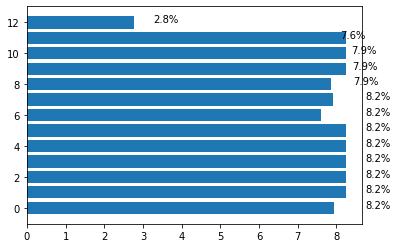

In [36]:
plot_category(df,'Activity')


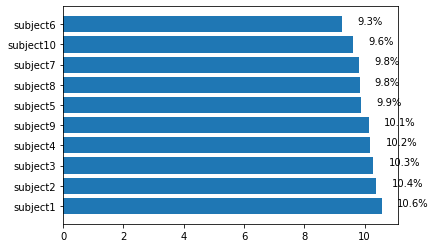

In [37]:

plot_category(df,'subject')

EDA of 1 subject data

In [38]:
subject1 = df[df['subject']=='subject1']
subject1.Activity.value_counts()

0     4243
8     3379
11    3072
10    3072
9     3072
7     3072
6     3072
5     3072
4     3072
3     3072
2     3072
1     3072
12    1075
Name: Activity, dtype: int64

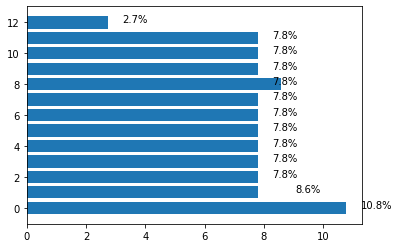

In [39]:
plot_category(subject1,'Activity')


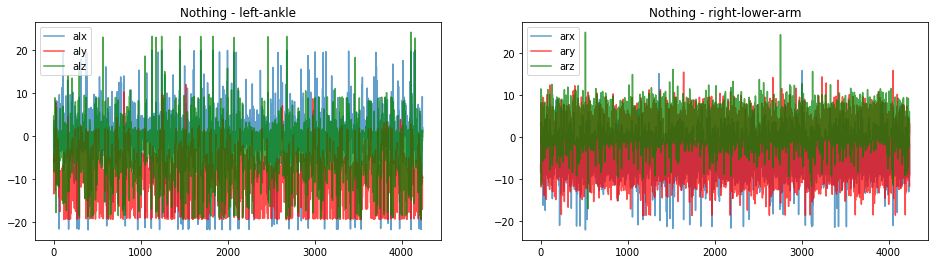

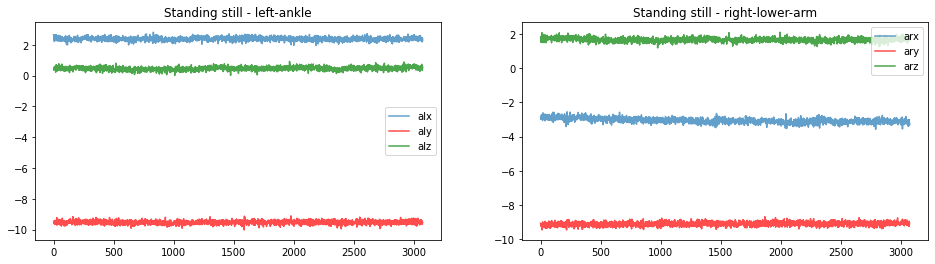

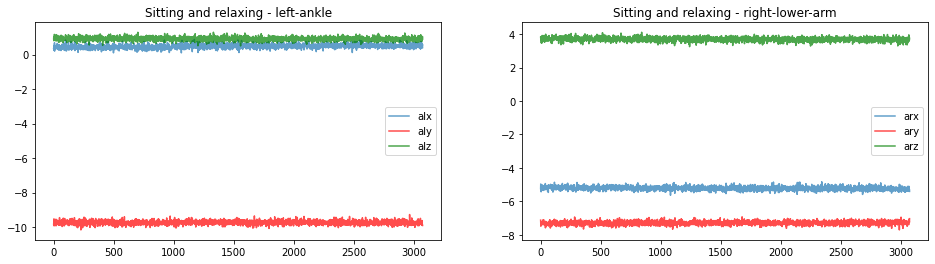

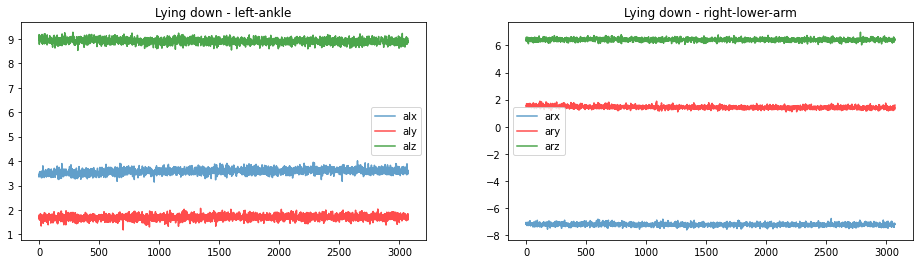

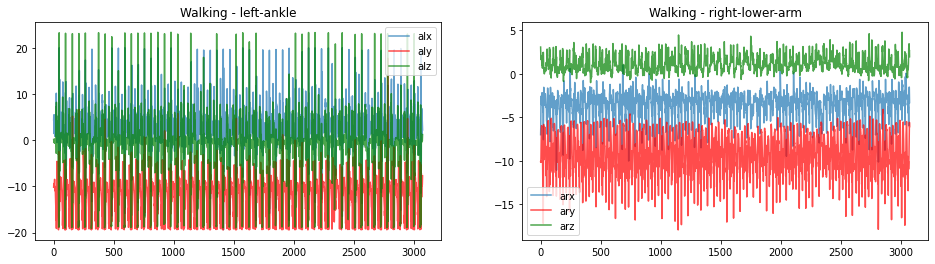

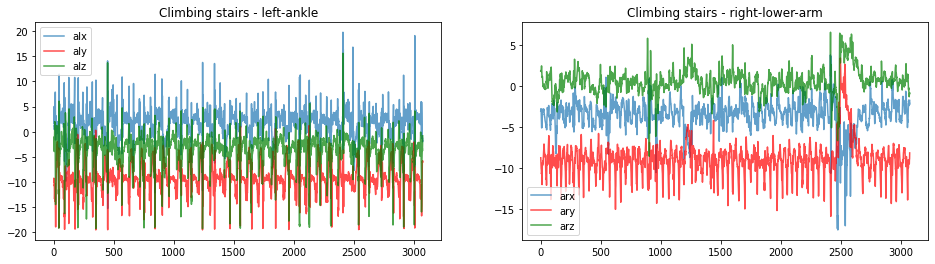

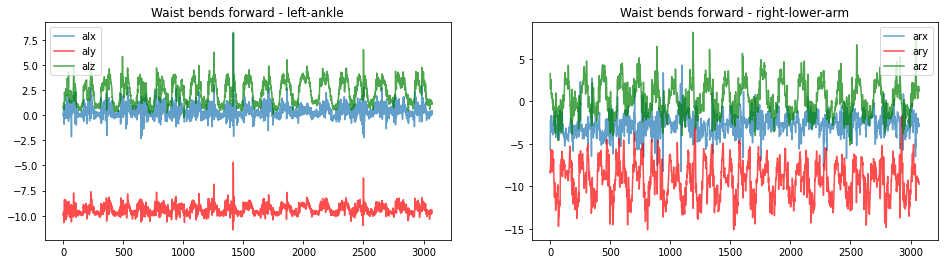

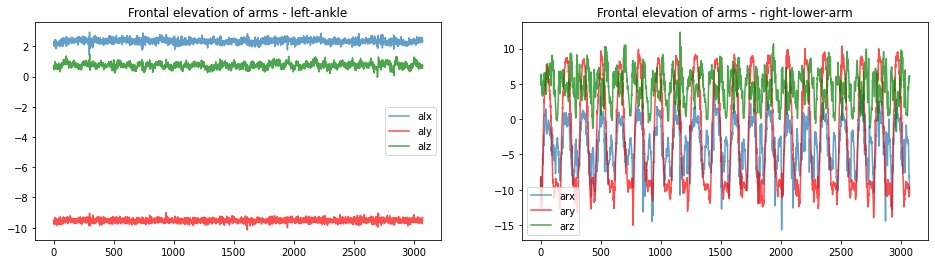

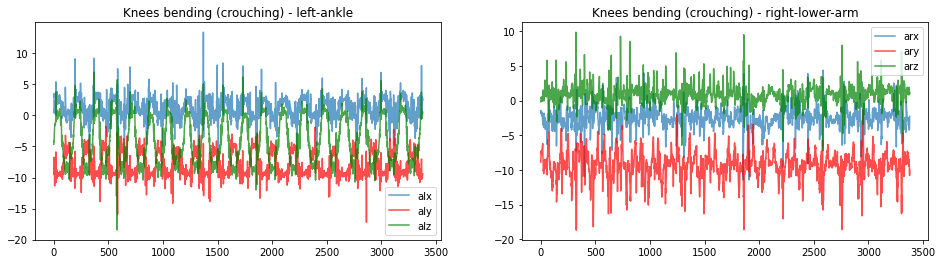

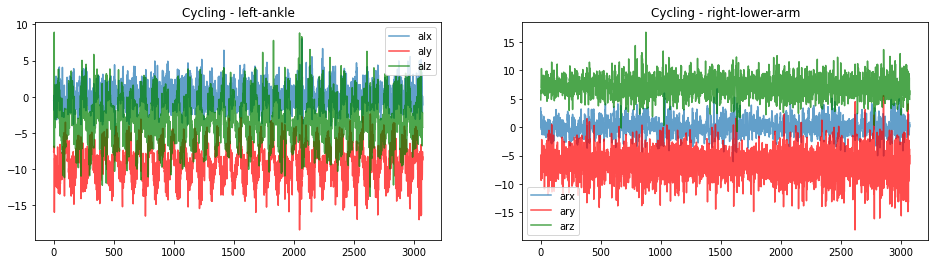

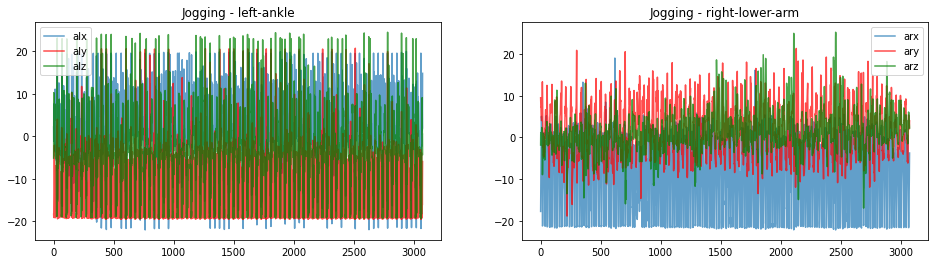

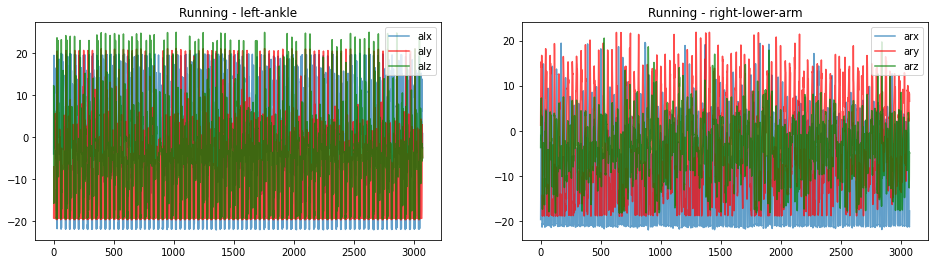

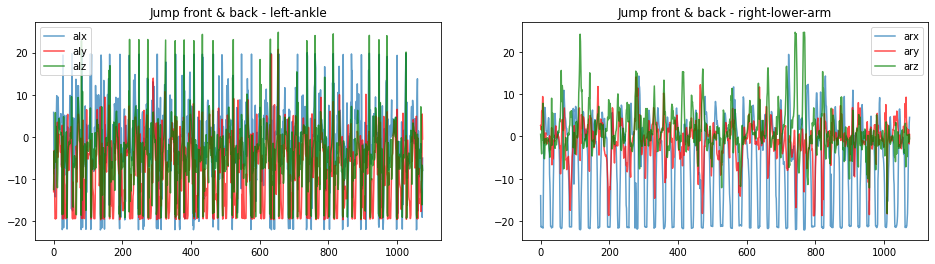

In [40]:
plot_comparison(subject1,'acceleration')

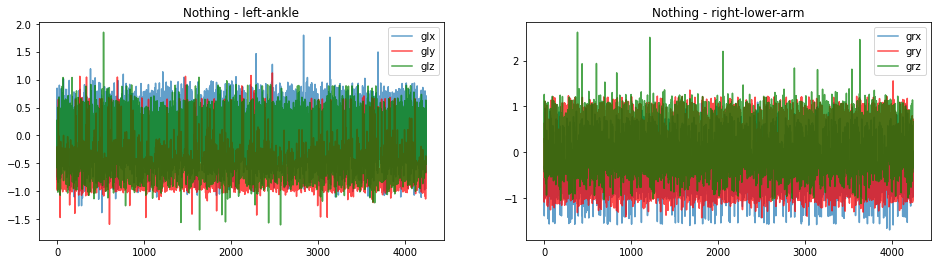

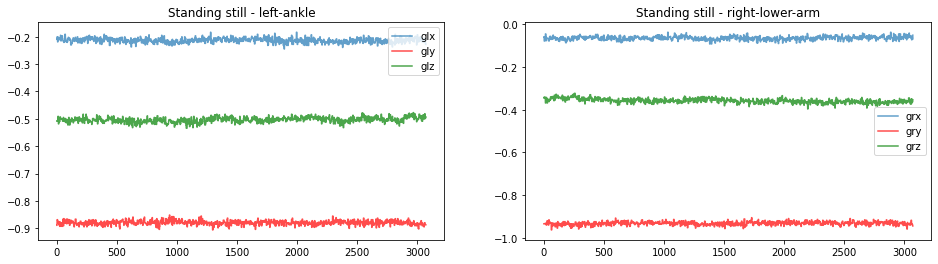

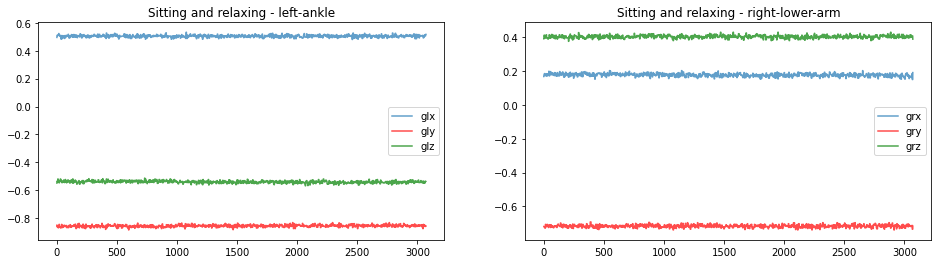

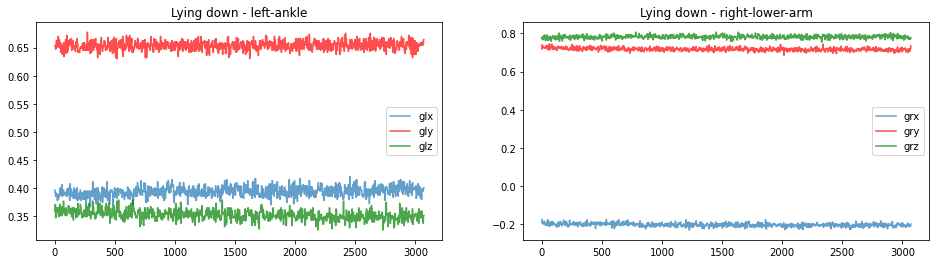

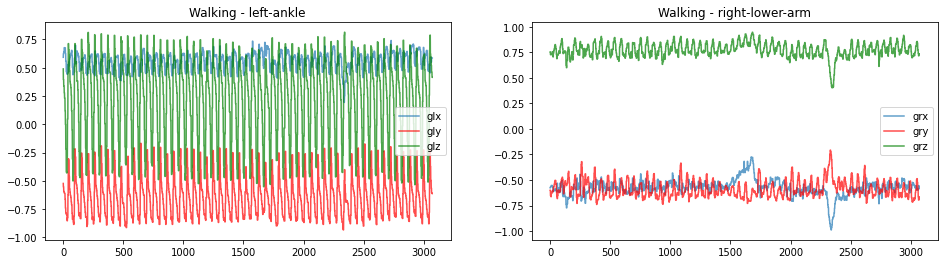

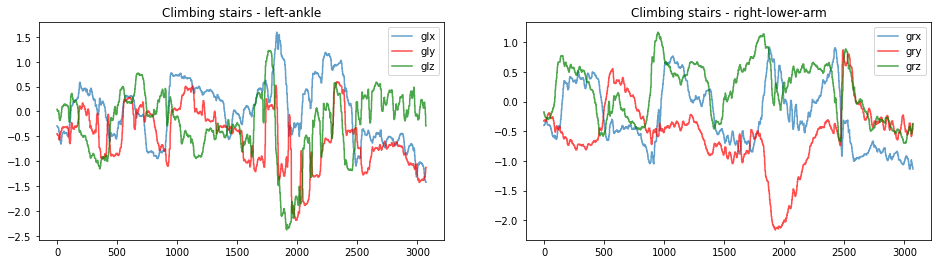

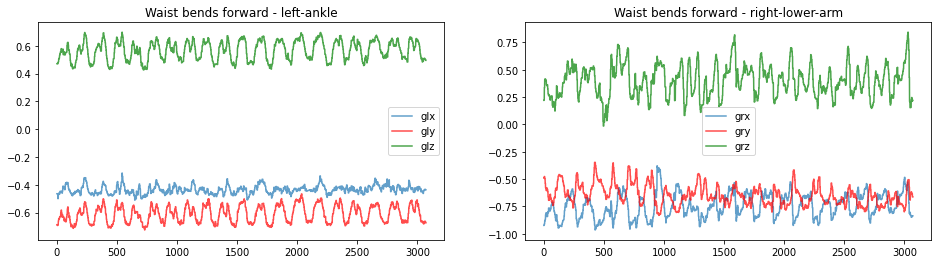

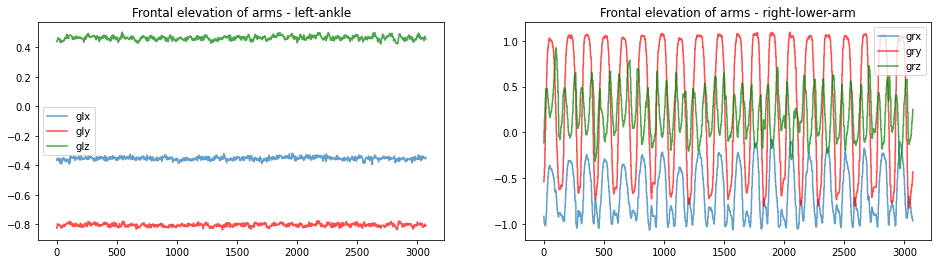

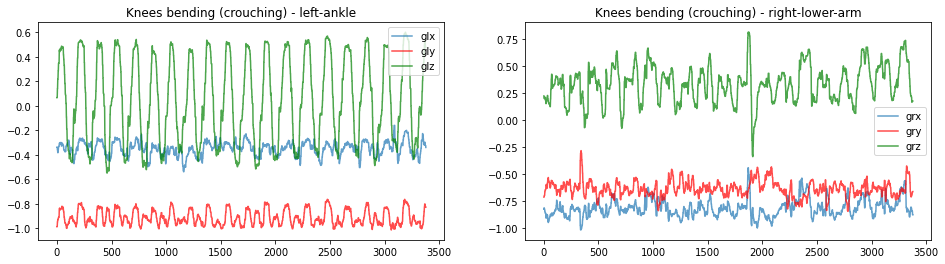

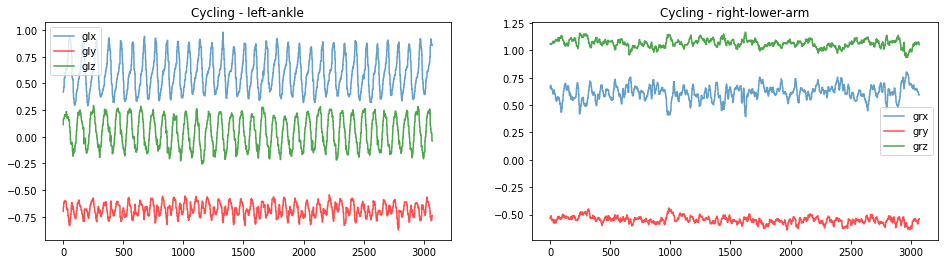

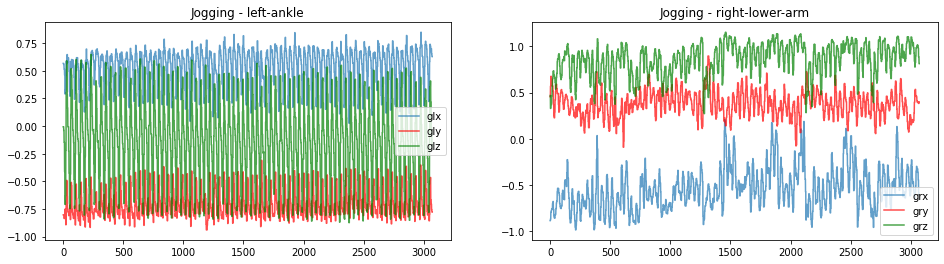

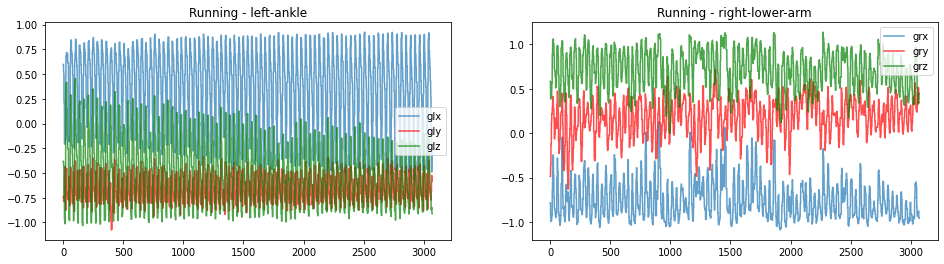

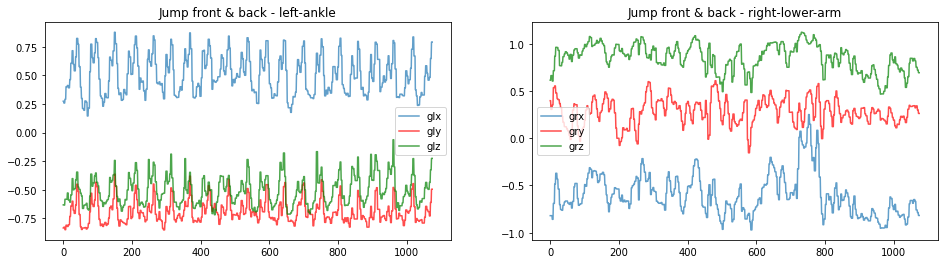

In [41]:
plot_comparison(subject1,'gyroscope')

EDA of Full Dataset

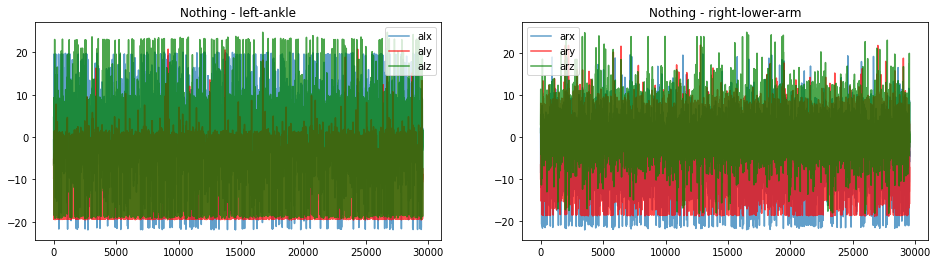

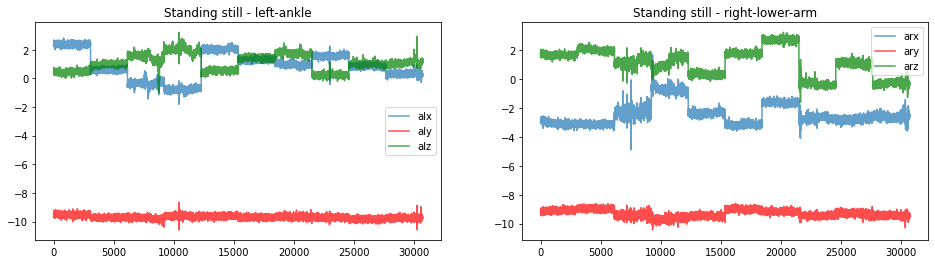

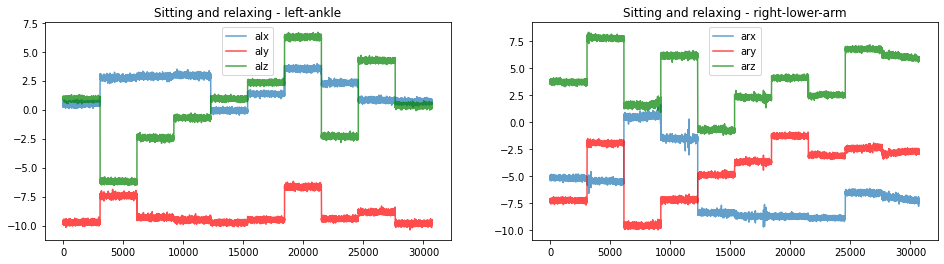

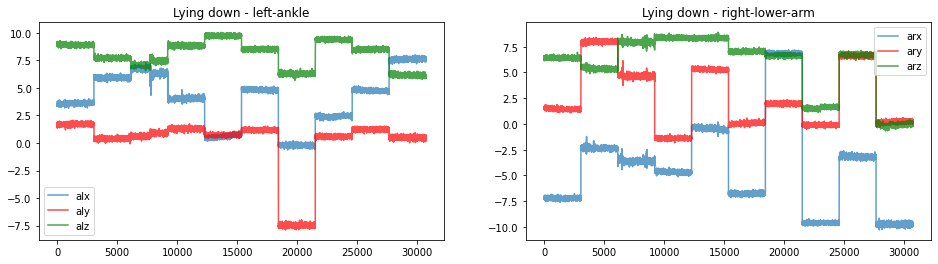

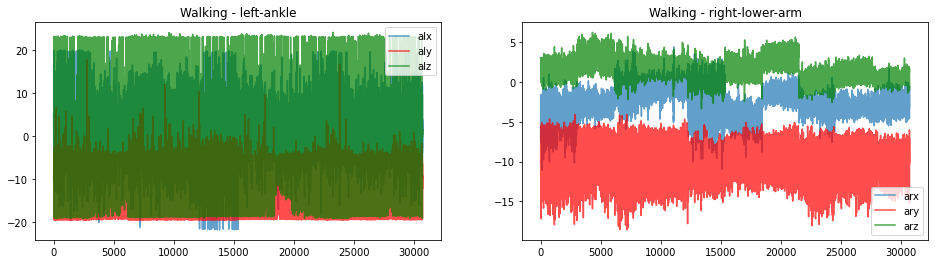

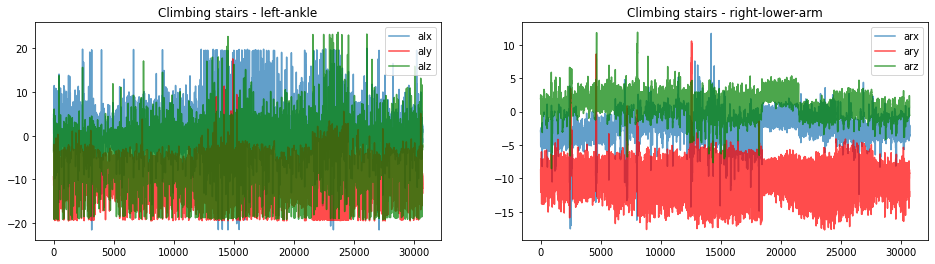

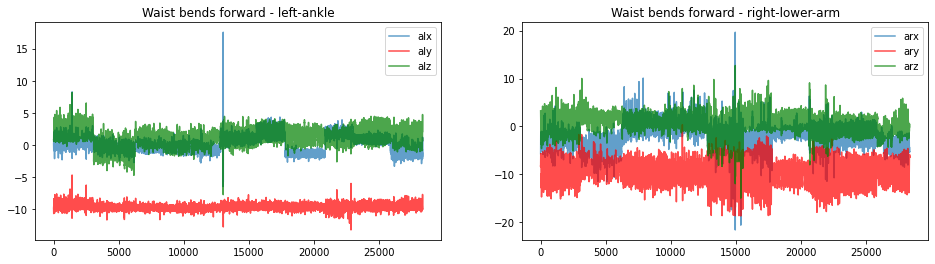

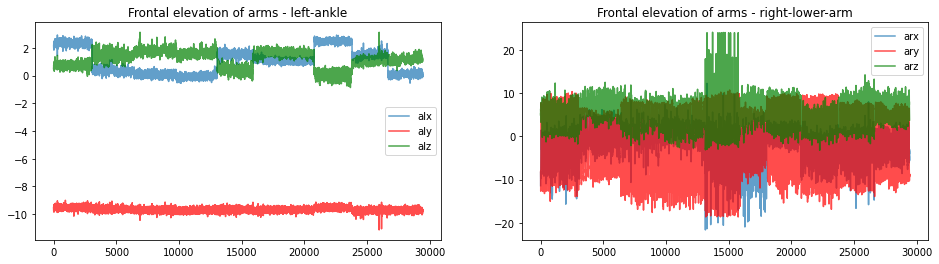

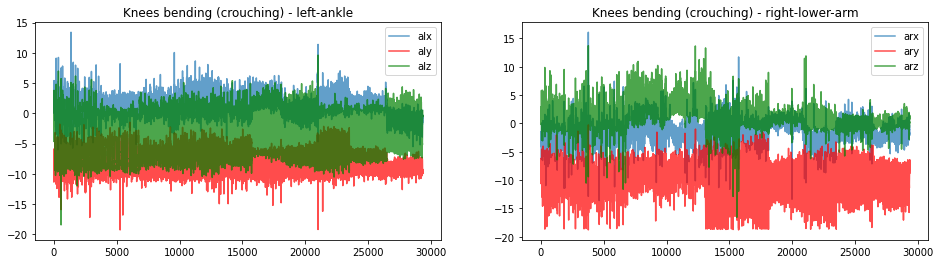

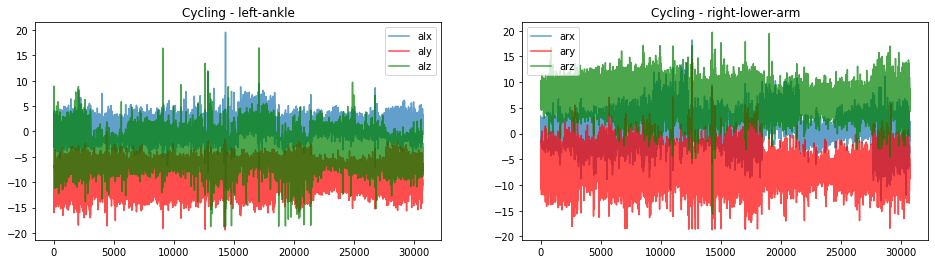

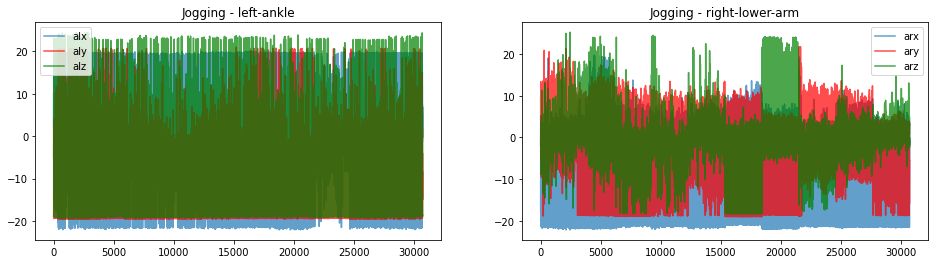

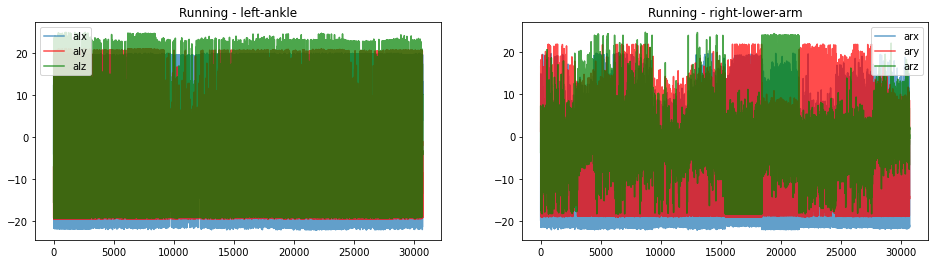

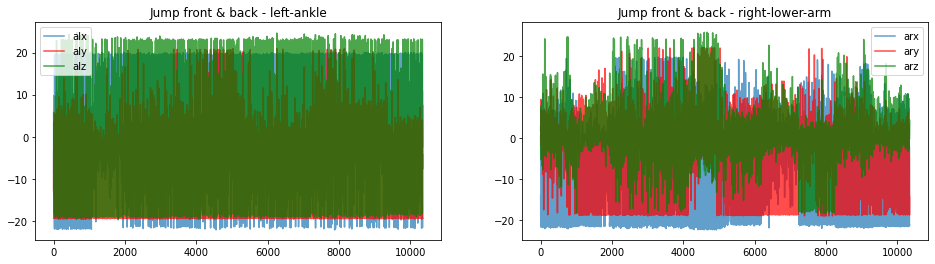

In [42]:

plot_comparison(df)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

<Figure size 576x432 with 0 Axes>

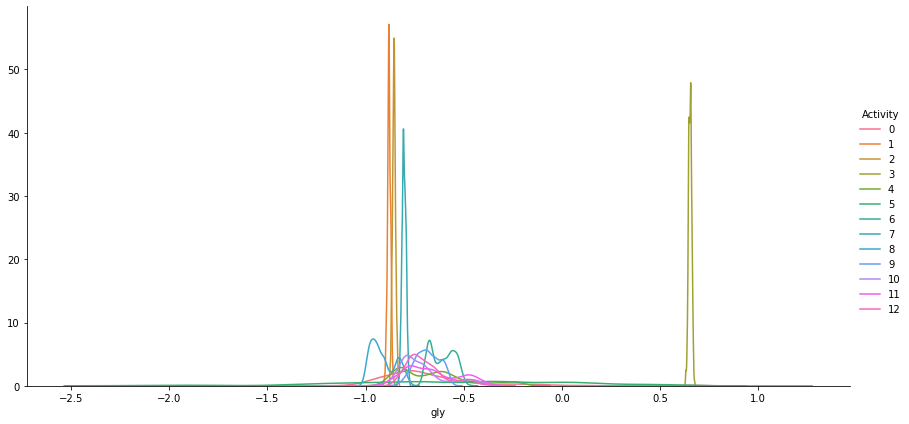

In [43]:
plt.figure(figsize=(8,6))
facetgrid = sns.FacetGrid(subject1, hue='Activity', height=6, aspect=2)
facetgrid.map(sns.distplot,'gly', hist=False).add_legend()
#sns.distplot('gly', hist=False, hue='Activity', data=df)
plt.show()

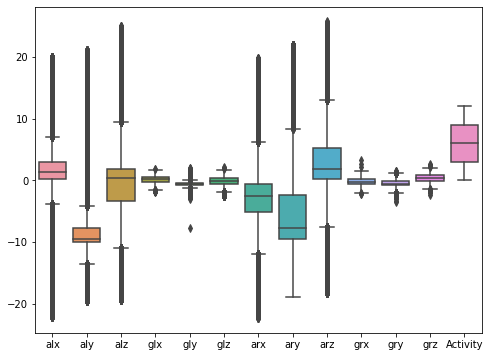

In [44]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df)
plt.show()

Data Cleaning

In [45]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
alx,372735.0,1.770455,4.171677,-22.1460,0.158815,1.36550,2.883200,20.0440
aly,372735.0,-9.128515,5.100531,-19.6190,-10.078000,-9.60640,-7.726200,21.1610
alz,372735.0,-0.726296,6.354113,-19.3730,-3.368250,0.29895,1.759600,25.0150
glx,372735.0,0.090230,0.463354,-1.8942,-0.354360,0.18367,0.484230,1.7941
gly,372735.0,-0.557152,0.427417,-7.7899,-0.810510,-0.69043,-0.493430,2.0038
glz,372735.0,-0.125316,0.554999,-2.6267,-0.571710,-0.11002,0.349710,2.1022
arx,372735.0,-3.478782,5.778589,-22.3450,-5.166500,-2.53390,-0.602910,19.8010
ary,372735.0,-5.783884,6.492916,-18.9720,-9.542600,-7.71190,-2.373100,21.9650
arz,372735.0,2.383707,4.147354,-18.2390,0.138570,1.83100,5.287100,25.7410
grx,372735.0,-0.209434,0.547686,-2.2392,-0.686270,-0.30784,0.252940,3.2588


In [46]:
df1 = df.copy()

In [47]:
for feature in df1.columns[:-2]:
  lower_range = np.quantile(df[feature],0.01)
  upper_range = np.quantile(df[feature],0.99)
  print(feature,'range:',lower_range,'to',upper_range)

  df1 = df1.drop(df1[(df1[feature]>upper_range) | (df1[feature]<lower_range)].index, axis=0)
  print('shape',df1.shape)

alx range: -11.47566 to 19.233659999999976
shape (365279, 14)
aly range: -19.379 to 2.450425999999972
shape (359570, 14)
alz range: -18.95 to 14.188279999999793
shape (355824, 14)
glx range: -0.74212 to 0.80705
shape (348955, 14)
gly range: -1.0675 to 0.9662299999999999
shape (342393, 14)
glz range: -1.1061 to 0.82908
shape (336952, 14)
arx range: -21.491999999999997 to 9.099461999999983
shape (331872, 14)
ary range: -18.694000000000006 to 11.95
shape (325812, 14)
arz range: -10.37732 to 11.822659999999974
shape (323248, 14)
grx range: -1.0196 to 0.95686
shape (319774, 14)
gry range: -1.1417 to 0.90965
shape (314957, 14)
grz range: -0.69828 to 1.125
shape (310552, 14)


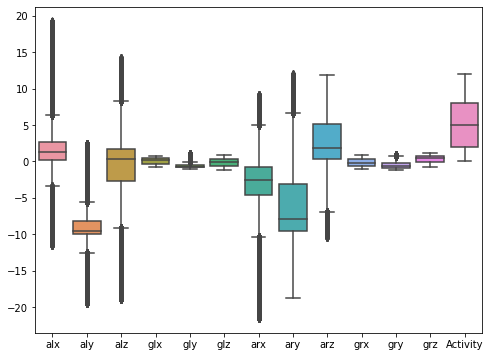

In [48]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df1)
plt.show()

Exporting Data

In [49]:
train = df1[(df1['subject'] != 'subject10') & (df1['subject'] != 'subject9')]
test = df1.drop(train.index, axis=0)
train.shape,test.shape

((246210, 14), (64342, 14))

In [50]:
train.to_csv('/content/MHEALTHDATASET/train.csv',index=False)
test.to_csv('/content/MHEALTHDATASET/test.csv',index=False)

In [52]:
train = pd.read_csv('/content/MHEALTHDATASET/train.csv')
test = pd.read_csv('/content/MHEALTHDATASET/test.csv')
train.shape,test.shape

((246210, 14), (64342, 14))

Human activity Recognition By RNN_LSTM

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [54]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import layers
import keras
 
%matplotlib inline

Modeling Data Preparation

In [55]:
train = pd.read_csv('/content/MHEALTHDATASET/train.csv')
test = pd.read_csv('/content/MHEALTHDATASET/test.csv')
train.shape,test.shape

((246210, 14), (64342, 14))

In [56]:
X_train = train.drop(['Activity','subject'],axis=1)
y_train = train['Activity']
X_test = test.drop(['Activity','subject'],axis=1)
y_test = test['Activity']
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((246210, 12), (246210,), (64342, 12), (64342,))

In [57]:
from scipy import stats
def create_dataset(X, y, time_steps, step=1):
    Xs, ys = [], []
    for i in range(0, len(X) - time_steps, step):
        x = X.iloc[i:(i + time_steps)].values
        labels = y.iloc[i: i + time_steps]
        Xs.append(x)
        ys.append(stats.mode(labels)[0][0])
    return np.array(Xs), np.array(ys).reshape(-1, 1)

In [58]:
X_train,y_train = create_dataset(X_train, y_train, 100, step=50)
X_train.shape, y_train.shape

((4923, 100, 12), (4923, 1))

In [59]:
X_test,y_test = create_dataset(X_test, y_test, 100, step=50)
X_test.shape, y_test.shape

((1285, 100, 12), (1285, 1))

In [60]:
#Model building
model = keras.Sequential()
model.add(layers.Input(shape=[100,12]))
model.add(layers.Conv1D(filters=32, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.Conv1D(filters=64, kernel_size=3, padding="same"))
model.add(layers.BatchNormalization())
model.add(layers.ReLU())
model.add(layers.MaxPool1D(2))
model.add(layers.LSTM(64))
model.add(layers.Dense(units=128, activation='relu'))
model.add(layers.Dense(13, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 100, 32)           1184      
_________________________________________________________________
batch_normalization (BatchNo (None, 100, 32)           128       
_________________________________________________________________
re_lu (ReLU)                 (None, 100, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 100, 64)           6208      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100, 64)           256       
_________________________________________________________________
re_lu_1 (ReLU)               (None, 100, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 50, 64)            0

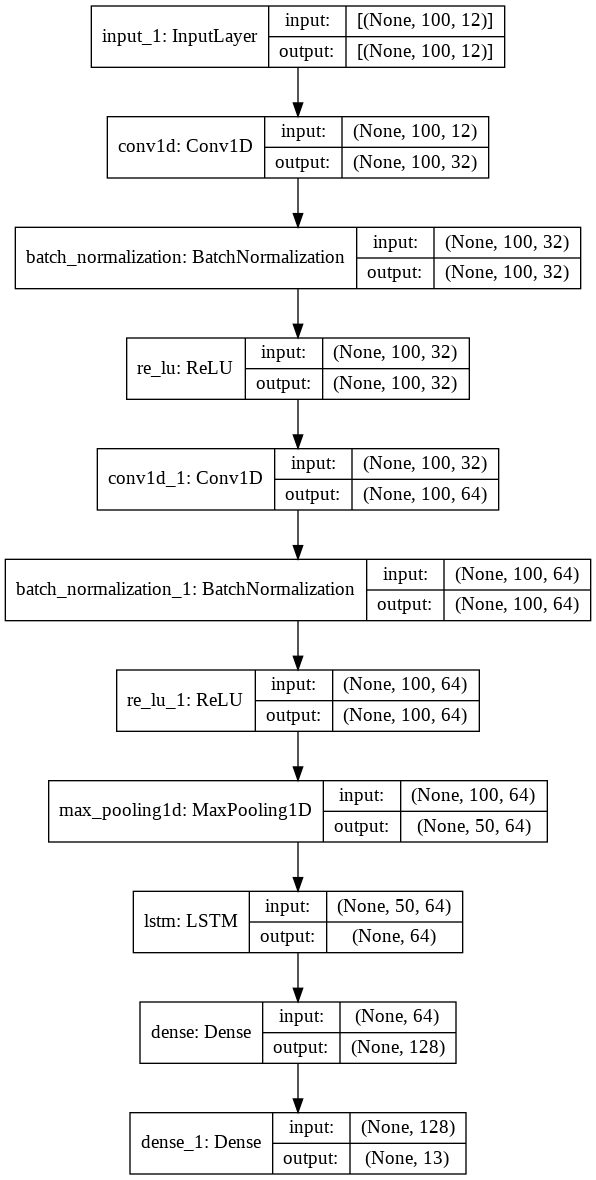

In [61]:
tf.keras.utils.plot_model(model, show_shapes=True)

In [63]:
callbacks = [keras.callbacks.ModelCheckpoint("/content/drive/MyDrive/Colab Notebooks/mHealth/mhealth_best.h5", save_best_only=True, monitor="val_loss"),
             keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1)]
 
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["sparse_categorical_accuracy"],)
 
model_history = model.fit(X_train,y_train, epochs= 10, validation_data=(X_test,y_test), callbacks=callbacks)

Epoch 1/10
154/154 [==============================] - 10s 49ms/step - loss: 1.3603 - sparse_categorical_accuracy: 0.6112 - val_loss: 1.8743 - val_sparse_categorical_accuracy: 0.5346
Epoch 2/10
154/154 [==============================] - 7s 45ms/step - loss: 0.1938 - sparse_categorical_accuracy: 0.9386 - val_loss: 0.5149 - val_sparse_categorical_accuracy: 0.8864
Epoch 3/10
154/154 [==============================] - 7s 45ms/step - loss: 0.1240 - sparse_categorical_accuracy: 0.9588 - val_loss: 0.4387 - val_sparse_categorical_accuracy: 0.8514
Epoch 4/10
154/154 [==============================] - 7s 45ms/step - loss: 0.0739 - sparse_categorical_accuracy: 0.9756 - val_loss: 0.4986 - val_sparse_categorical_accuracy: 0.9113
Epoch 5/10
154/154 [==============================] - 7s 45ms/step - loss: 0.0837 - sparse_categorical_accuracy: 0.9742 - val_loss: 0.6375 - val_sparse_categorical_accuracy: 0.8459
Epoch 6/10
154/154 [==============================] - 7s 45ms/step - loss: 0.0917 - sparse_cat

Model Evaluation

In [64]:
model_history.history

{'loss': [0.7683653235435486,
  0.18618366122245789,
  0.12243565917015076,
  0.08646106719970703,
  0.07746083289384842,
  0.06776150315999985,
  0.04005139321088791,
  0.04466353729367256,
  0.02558237686753273,
  0.01131108496338129],
 'sparse_categorical_accuracy': [0.7700589299201965,
  0.9398740530014038,
  0.9591712355613708,
  0.9727808237075806,
  0.9760308861732483,
  0.9784684181213379,
  0.9853747487068176,
  0.9861872792243958,
  0.9916717410087585,
  0.9963436722755432],
 'val_loss': [1.8743137121200562,
  0.5149210095405579,
  0.4387383759021759,
  0.49858924746513367,
  0.6374834775924683,
  0.28289902210235596,
  0.4620654284954071,
  0.12628521025180817,
  0.5470425486564636,
  0.1579199880361557],
 'val_sparse_categorical_accuracy': [0.5346303582191467,
  0.8863813281059265,
  0.851361870765686,
  0.9112840294837952,
  0.8459144234657288,
  0.8926070332527161,
  0.9035019278526306,
  0.9673151969909668,
  0.9175097346305847,
  0.9649805426597595]}

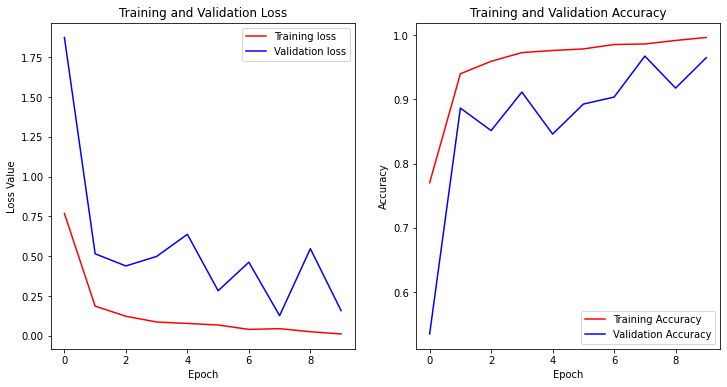

In [65]:
train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
train_accuracy = model_history.history['sparse_categorical_accuracy']
val_accuracy = model_history.history['val_sparse_categorical_accuracy']

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.plot(train_loss, 'r', label='Training loss')
plt.plot(val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss Value')
plt.legend()

plt.subplot(1,2,2)
plt.plot(train_accuracy, 'r', label='Training Accuracy')
plt.plot(val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [66]:
model = keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/mHealth/mhealth_best.h5")

train_loss, train_acc = model.evaluate(X_train,y_train)
test_loss, test_acc = model.evaluate(X_test,y_test)

print("Train accuracy", round(train_acc*100, 2),'%')
print("Train loss", train_loss)
print("Test accuracy", round(test_acc*100, 2),'%')
print("Test loss", test_loss)

41/41 [==============================] - 0s 11ms/step - loss: 0.1263 - sparse_categorical_accuracy: 0.9673
Train accuracy 99.59 %
Train loss 0.014951598830521107
Test accuracy 96.73 %
Test loss 0.12628521025180817


In [68]:
pred = model.predict(X_test)
pred = np.argmax(pred, axis = 1)
pred = pred.reshape(-1,1)

In [69]:
pred.shape,y_test.shape

((1285, 1), (1285, 1))

In [70]:
from sklearn.metrics import confusion_matrix, classification_report
 
print(classification_report(y_test,pred))
print('*'*50)
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        90
           1       1.00      0.98      0.99       124
           2       1.00      0.99      1.00       122
           3       0.99      0.99      0.99       124
           4       1.00      0.99      1.00       120
           5       0.91      1.00      0.95        84
           6       0.80      1.00      0.89       104
           7       0.99      1.00      1.00       112
           8       1.00      0.73      0.84       117
           9       0.99      0.99      0.99       121
          10       0.96      1.00      0.98        89
          11       0.98      0.98      0.98        51
          12       1.00      0.89      0.94        27

    accuracy                           0.97      1285
   macro avg       0.97      0.97      0.97      1285
weighted avg       0.97      0.97      0.97      1285

**************************************************
[[ 90   0   0   0   0   0   

In [71]:

label_map = {
    0: 'Nothing',
    1: 'Standing still',  
    2: 'Sitting and relaxing', 
    3: 'Lying down',  
    4: 'Walking',  
    5: 'Climbing stairs',  
    6: 'Waist bends forward',
    7: 'Frontal elevation of arms', 
    8: 'Knees bending (crouching)', 
    9: 'Cycling', 
    10: 'Jogging', 
    11: 'Running', 
    12: 'Jump front & back' 
}

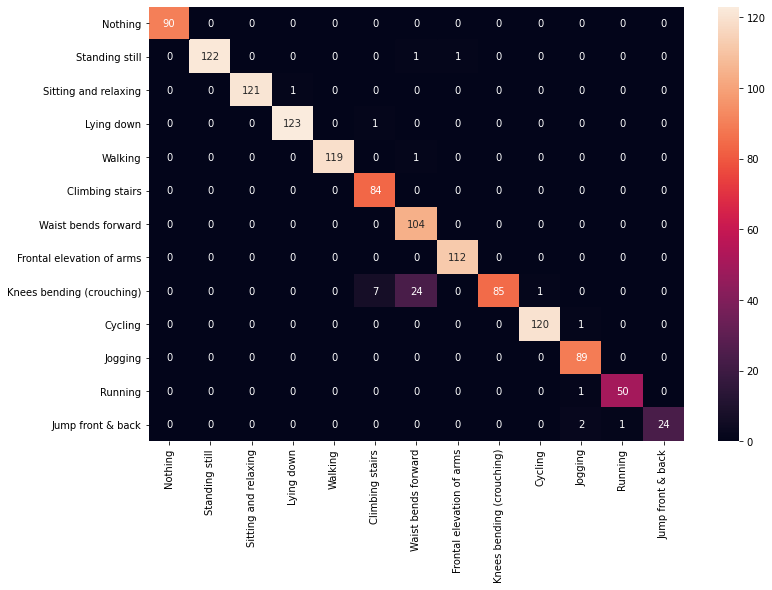

In [72]:
plt.figure(figsize=(12,8))
conf_matrix = confusion_matrix(y_test,pred)
sns.heatmap(conf_matrix, xticklabels= label_map.values(), yticklabels= label_map.values(), annot=True, fmt="d")
plt.show()